In [1]:
%pylab inline
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

# Desain dari Persyaratan Respons Amplitudo

Baik dengan fir_design_helper maupun iir_design_helper, desain dimulai dengan persyaratan respons amplitudo, yaitu frekuensi kritis jalur lewat filter, frekuensi kritis jalur hentian, gelombang berombak jalur lewat, dan penurunan jalur hentian. urutan filter (kasus IIR) diperlukan untuk memenuhi persyaratan ini kemudian ditentukan dan koefisien filter dikembalikan sebagai array b dan a untuk IIR, dan array sos 2D, dengan baris yang berisi kaskade yang sesuai dari topologi bagian kedua orde untuk filter IIR.

# Desain Filter IIR Tradisional Menggunakan Bilinear Transform

Paket scipy.signal sepenuhnya mendukung desain filter digital IIR dari prototipe analog. Filter IIR seperti filter FIR, biasanya dirancang dengan mempertimbangkan persyaratan respons amplitudo. Sejumlah fungsi desain tersedia langsung dari scipy.signal untuk tujuan ini, khususnya fungsi scipy.signal.iirdesign(). Untuk membuat desain filter lowpass, highpass, bandpass, dan bandstop konsisten dengan modul fir_design_helper.py, modul iir_design_helper.py ditulis. Gambar 2, di bawah ini, menjelaskan bagaimana parameter respons amplitudo didefinisikan secara grafis.

![image.png](<attachment:Screenshot 2024-05-23 145510.png>)
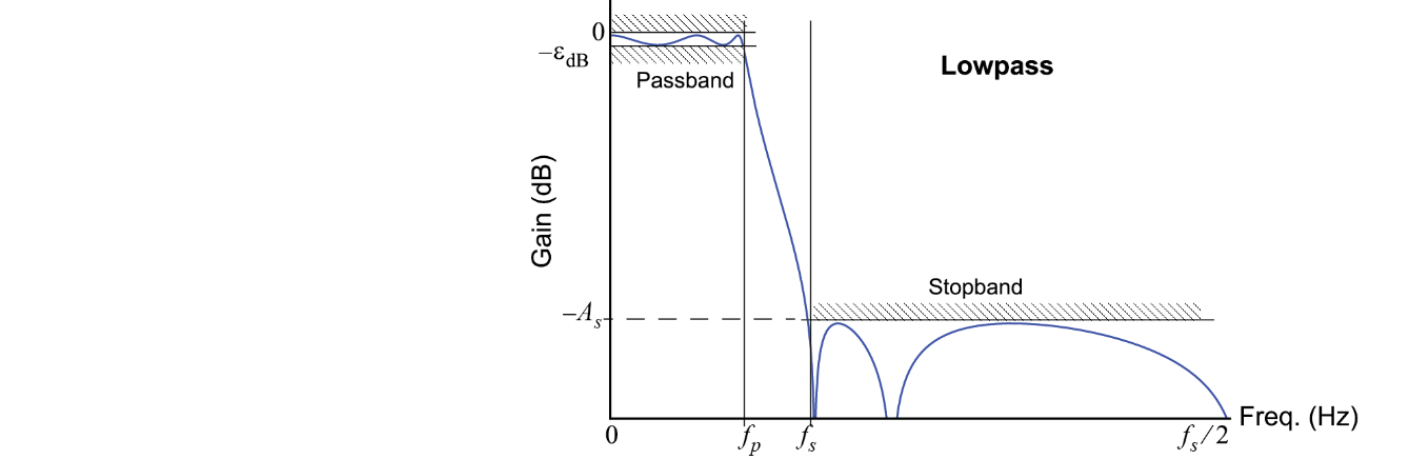

![image.png](<attachment:Screenshot 2024-05-23 145534.png>)
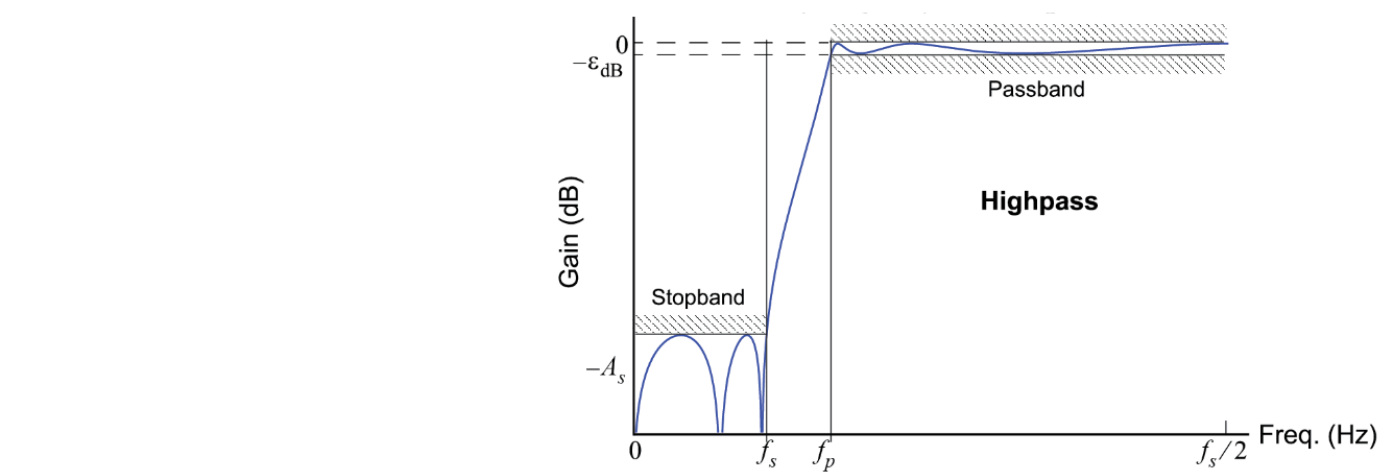

![image.png](<attachment:Screenshot 2024-05-23 145554.png>)
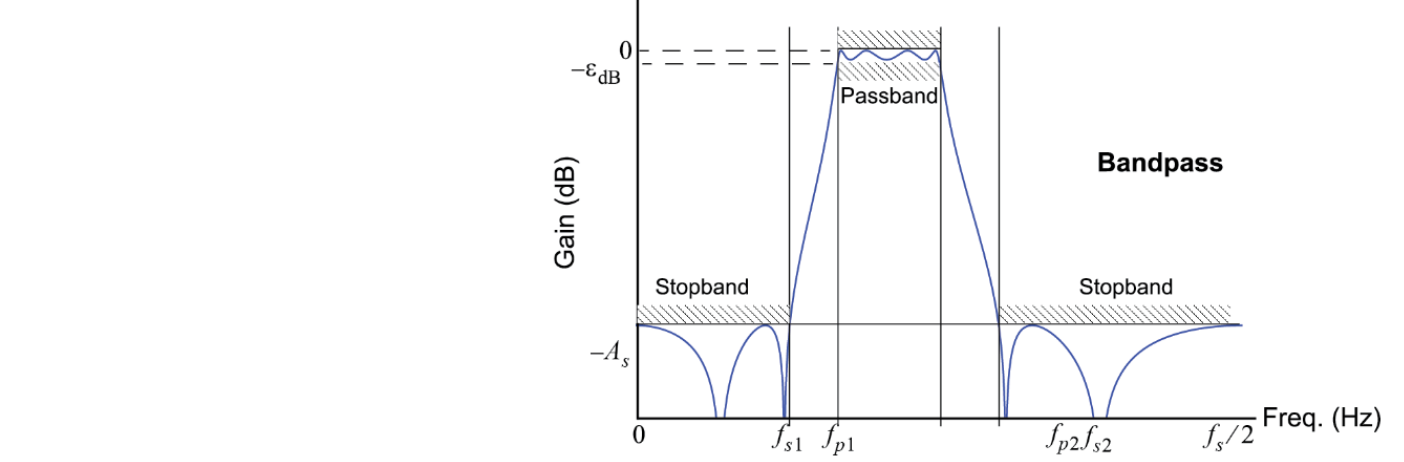

![image.png](<attachment:Screenshot 2024-05-23 145427.png>)
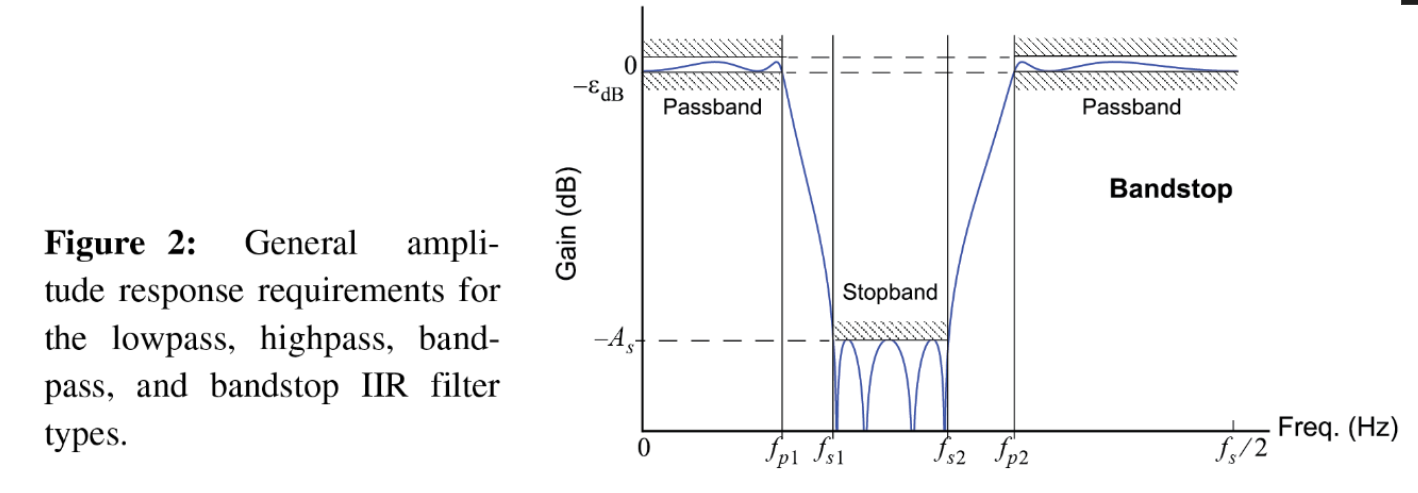

Di dalam iir_design_helper.py, terdapat empat fungsi desain filter dan sejumlah fungsi pendukung yang tersedia. Keempat fungsi desain filter tersebut digunakan untuk merancang filter lowpass, highpass, bandpass, dan bandstop, dengan memanfaatkan prototipe filter Butterworth, Chebyshev tipe 1, Chebyshev tipe 2, dan eliptikal. untuk informasi desain yang lebih detail. Antarmuka fungsi tersebut dijelaskan dalam Tabel 2.

![image.png](<attachment:Screenshot 2024-05-23 145636.png>)
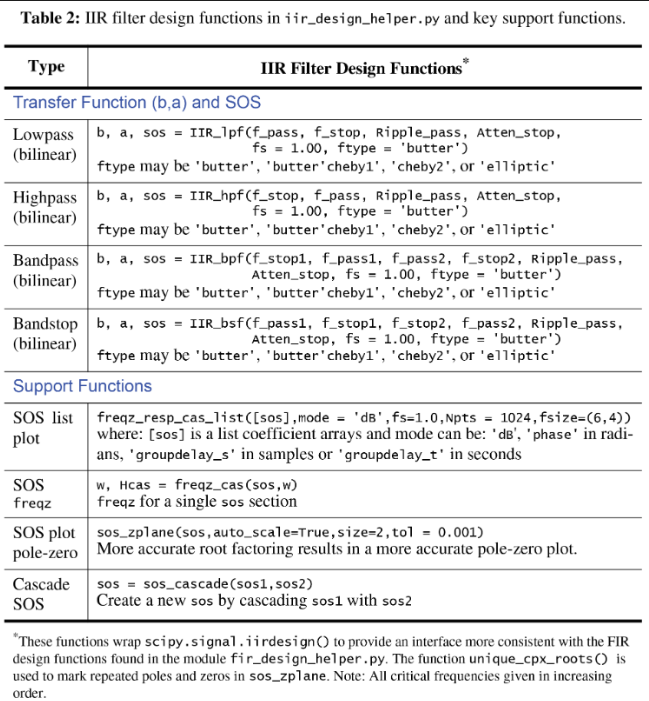

Fungsi filter mengembalikan koefisien filter dalam dua format:

1. Dalam bentuk fungsi transfer tradisional sebagai array koefisien pembilanbb` dan koefisien penyebu a`, dan
2. Dalam bentuk rangkaian dari bagian biquadratic menggunakan matriks atau array sos yang sebelumnya diperkenalkan.

Kedua format disediakan untuk memungkinkan analisis lebih lanjut dengan topologi bentuk langsung atau bentuk sos. Fugsi `signal.iirdesgn()` yang mendasarinya juga menyediakan opsi ketiga: daftar pole dan zero. Betuk`sos` diinginkan untuk filter presisi tinggi, karena lebih tahan terhadap kuantisasi koefisien, meskipun menggunakan koefisien presisi ganda dalam ary `b`dn `a`.

Dari fungsi pendukung yang tersisa, empat juga dijelaskan dalam Tabel 2 di atas. Fungsi yang paling signifikan dalah `freqz_resp_cs_list`, yang tersedia untuk membandingkan respons frekuensi secara grafis di beberapa desai, dan `soszplane` sebuah fungsi untuk memplot pola pole-zero. Keduanya beroperasi menggunakan mtris `sos`. Sebuah bentuk fungsi tr(sfe (`b/a`) untuk memplot respons frekensi, `freqz_rep_list`, juga ada dalam modul ini. Fungsi ini pertama kali diperkenalkan dalam bagian desain FIR. Fungsi plotting respons frekuensi menawarkan mode untuk gain dalam dB, fase dalam radian, delay grup dalam sampel, dan delay grup dalam detik, semua untuk sampling rate tertentu dalam Hz yang diberikan. Fungsi plotting pole-zero mengidentifikasi pole dan zero dengan lebih akurat daipada `sk_dsp_commsigsyszplane`, karena fungsinumpy `oots()` hanya menyelesaikan polinomial kuadrat. Juga, akar berulang dapat ditampilkan seperti yang diharapkan secara teoretis, dan juga diperhatikan dalam tampilan grafis dengan superskrip di samping penanda pole dan zero.

## Desain IIR Berdasarkan Transformasi Bilinear
Ada beberapa cara untuk merancang filter IIR berdasarkan persyaratan respons amplitudo. Ketika keinginan adalah agar aproksimasi filter mengikuti prototipe analog seperti Butterworth, Chebychev, dll., menggunakan transformasi bilinear. Fungsi signal.iirdesign() yang dijelaskan di atas melakukan hal ini dengan tepat.

Dalam contoh di bawah ini, kita pertimbangkan persyaratan respons amplitudo lowpass dan melihat bagaimana urutan filter berubah saat kita memilih prototipe analog yang berbeda.

### Contoh: Perbandingan Desain Lowpass
Persyaratan respons amplitudo lowpass dengan $f_s = 48$ kHz adalah:
1. $f_\text{pass} = 5$ kHz
2. $f_\text{stop} = 8$ kHz
3. Ripple passband sebesar 0.5 dB
4. Attenuasi stopband sebesar 60 dB

Rancang empat filter untuk memenuhi persyaratan yang sama: butter, cheby1, cheby2, dan ellip:

In [3]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

![image.png](<attachment:Screenshot 2024-05-23 145818.png>)
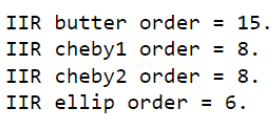

#### Perbandingan Respons Frekuensi
Di sini kita membandingkan respons magnitudo dalam dB menggunakan bentuk`so` dari masing-masing filter sebagai input. Filter eliptikal adalah yang paling efisien, dan bahkan berhasil melebihi persyaratan stopband dengan mencapai kurang dari 8 kHz.

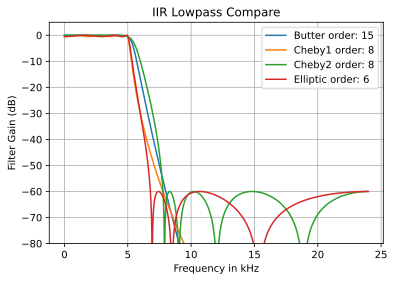

In [4]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1), 
        r'Cheby2 order: %d' % (len(a_cheb2)-1), 
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

Selanjutnya, plot konfigurasi pole-zero dari desain butterworth saja. Di sini kita menggunakan versi khusus dari ss.zplane yang berfungsi dengan array 2D sos.

(15, 15)

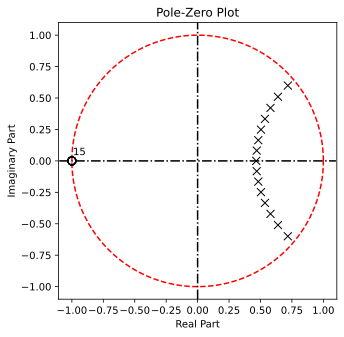

In [5]:
iir_d.sos_zplane(sos_but)

Catatan bahwa dua plot di atas juga dapat diperoleh menggunakan bentuk fungsi transfer melalui `iir_d.freqz_resp_list([b],[a],'dB',fs=48)` dan `ss.zplane(b,a)` masing-masing. Bentuk `sos` akan memberikan hasil yang lebih akurat, karena kurang sensitif terhadap kuantisasi koefisien. Hal ini terutama benar untuk plot pole-zero, karena merooting polinomial derajat ke-15 jauh lebih rentan terhadap kesalahan dibandingkan merooting polinomial kuadrat sederhana.

Untuk Butterworth orde ke-15, transformasi bilinear memetakan 15 nol domain-s ke tak hingga menjadi $z=-1$. Jika Anda menggunakan `sk_dsp_comm.sigsys.zplane()`, Anda akan menemukan bahwa 15 nol berada dalam lingkaran rapat di sekitar $z=-1$, menunjukkan kesalahan merooting polinomial. Demikian pula, respons frekuensi akan lebih akurat.

Pemfilteran sinyal dari array `x` dilakukan menggunakan desain filter dengan fungsi dari `scipy.signal`:

1. Untuk bentuk fungsi transfer `y = signal.lfilter(b,a,x)`
2. Untuk bentuk sos `y = signal.sosfilt(sos,x)`sos,x)`

## Desain Filter Half-Band untuk Melewati hingga $W/2$ saat $f_s = 8$ kHz
Di sini kita mempertimbangkan desain lowpass yang perlu melewati frekuensi hingga $f_s/4$. Secara khusus ketika $f_s = 8000$ Hz, passband filter menjadi [0, 2000] Hz. Setelah koefisien ditemukan, sebuah objek`mrh.multirat` diciptakan untuk memungkinkan studi lebih lanjut tentang filter, dan akhirnya menerapkan filtering dari sinyal white noise.

Mulailah dengan desain eliptikal yang memiliki transition band yang terpusat pada 2000 Hz dengan ripple passband sebesar 0.5 dB dan attenuasi stopband sebesar 80 dB. Bandwidth transisi diatur menjadi 100 Hz, dengan 50 Hz di setiap sisi dari 2000 Hz.

In [6]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

![image.png](<attachment:Screenshot 2024-05-23 145932.png>)
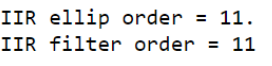

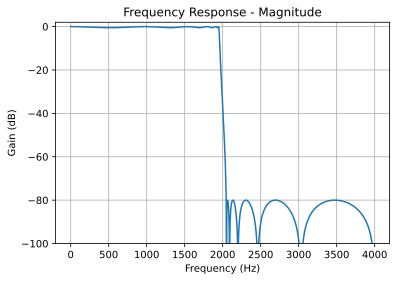

In [7]:
mr_lp.freq_resp('db',8000)

Lewatkan white noise Gaussian dengan varians $\sigma_x^2 = 1$ melalui filter. Gunakan banyak sampel sehingga estimasi spektral dapat membentuk dengan akurat $S_y(f) = \sigma_x^2\cdot |H(e^{j2\pi f/f_s})|^2 = |H(e^{j2\pi f/f_s})|^2$.

(-130.0, -30.0)

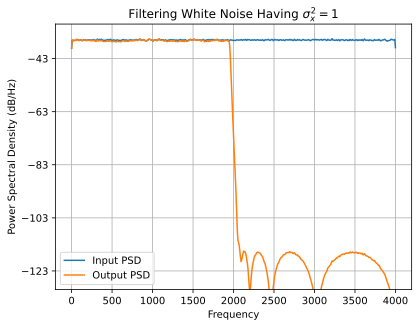

In [8]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

In [9]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


## Desain Bandpass Respons Amplitudo
Di sini kita pertimbangkan desain bandpass IIR untuk digunakan dalam demodulator SSB untuk menghapus sinyal saluran sebelah yang mungkin berada di kedua sisi dari sebuah pita frekuensi yang berjalan dari 23 kHz hingga 24 kHz.

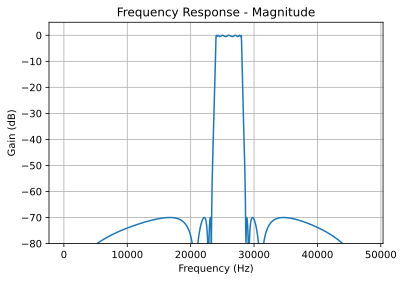

In [13]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Elliptical orde tinggi ini memiliki respons amplitudo yang bagus dan rapat untuk jumlah koefisien minimal, tetapi delay grupnya buruk:

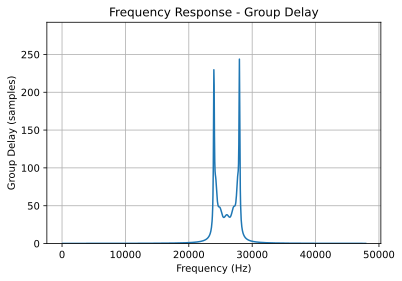

In [14]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();